<a href="https://colab.research.google.com/github/rkmad/pytorch_experiments/blob/main/PyTorch_Intro_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

28 Feb 2022
Intro to PyTorch


# Quickstart

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [ ]:
# download train/test data from torchvision datasets
# Fashion MNIST
# We load the FashionMNIST Dataset with the following parameters:
# root is the path where the train/test data is stored,
# train specifies training or test dataset,
# download=True downloads the data from the internet if it’s not available at root.
# transform and target_transform specify the feature and label transformations

train_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download=True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# pass the Datasets as an argument to Dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_loader:
  print(f"Shape of X [N,C,H,W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N,C,H,W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# define a neural network, create class inherited from nn.Module.
# Layers defined in __init__ and specify how data passes through using the forward function

# select GPU if available
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f"Using {device}")

# Define model class
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(), # Rectified Linear Unit
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NN().to(device)
print(model)


Using cuda
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# optimize Model parameters
# loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
# In a single training loop, the model makes predictions on the training dataset (fed to it in batches),
# and backpropagates the prediction error to adjust the model’s parameters.

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    # compute prediction error
    pred = model(X)
    loss = loss_fn(pred,y)

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
# function to check performance against test dataset to ensure model is learning

def test(dataloader, model, loss_fn):
  size =  len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
# The training process is conducted over several iterations (epochs).
# During each epoch, the model learns parameters to make better predictions.
# We print the model’s accuracy and loss at each epoch; we’d like to see the accuracy increase and the loss decrease with every epoch.

epochs =5
for t in range(epochs):
  print(f"Epoch {t+1}\n-----------------------")
  train(train_loader,model, loss_fn, optimizer)
  test(test_loader, model, loss_fn)
print("Done")

Epoch 1
-----------------------
loss: 2.317152 [    0/60000]
loss: 2.299106 [ 6400/60000]
loss: 2.275401 [12800/60000]
loss: 2.261629 [19200/60000]
loss: 2.259942 [25600/60000]
loss: 2.225486 [32000/60000]
loss: 2.237476 [38400/60000]
loss: 2.206996 [44800/60000]
loss: 2.200217 [51200/60000]
loss: 2.167426 [57600/60000]
Test error: 
 Accuracy: 36.3%, Avg loss: 2.168623 

Epoch 2
-----------------------
loss: 2.184454 [    0/60000]
loss: 2.172729 [ 6400/60000]
loss: 2.117136 [12800/60000]
loss: 2.128956 [19200/60000]
loss: 2.095549 [25600/60000]
loss: 2.029051 [32000/60000]
loss: 2.064311 [38400/60000]
loss: 1.988774 [44800/60000]
loss: 1.983336 [51200/60000]
loss: 1.925088 [57600/60000]
Test error: 
 Accuracy: 57.1%, Avg loss: 1.927819 

Epoch 3
-----------------------
loss: 1.959154 [    0/60000]
loss: 1.929278 [ 6400/60000]
loss: 1.821458 [12800/60000]
loss: 1.856853 [19200/60000]
loss: 1.762715 [25600/60000]
loss: 1.702443 [32000/60000]
loss: 1.726804 [38400/60000]
loss: 1.625188 [4

In [ ]:
# save model
torch.save(model.state_dict(),"model1.pth")
print("Saved PyTorch Model State")

# load model
model= NN()
model.load_state_dict(torch.load("model1.pth"))


In [ ]:
# use model to make predictions

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x,y = test_data[0][0], test_data[0][1]
with torch.no_grad():
  pred= model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')




Predicted: "Ankle boot", Actual: "Ankle boot"


# Tensors

In [ ]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
# tensors from np array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
# From another tensor:
# The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9626, 0.6836],
        [0.2077, 0.7853]]) 



In [ ]:
# need to explicitly move tensors to GPU
if torch.cuda.is_available():
  tensor = x_np.to("cuda")


In [ ]:
#Standard numpy-like indexing and slicing:

tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# In-place operations Operations that store the result into the operand are called in-place.
# They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

# In-place operations save some memory,
# but can be problematic when computing derivatives because of an immediate loss of history.
# Hence, their use is discouraged.

# DATASETS & DATALOADERS

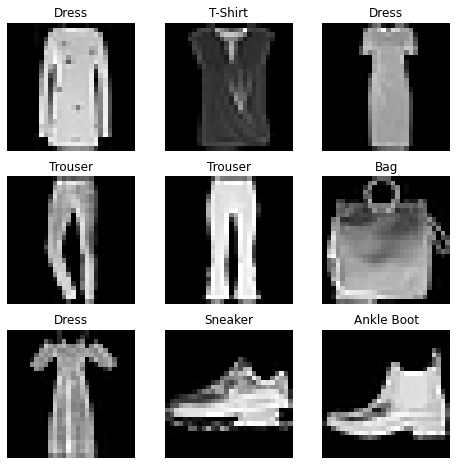

In [ ]:
# Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# BUILD THE NEURAL NETWORK


In [ ]:
# Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.
# We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


In [ ]:
# Model Layers
# Let’s break down the layers in the FashionMNIST model. To illustrate it,
# we will take a sample minibatch of 3 images of size 28x28 and see what happens
# to it as we pass it through the network.

input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
# nn.Flatten
# We initialize the nn.Flatten layer to convert each 2D 28x28 image into a
# contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
# nn.Linear
# The linear layer is a module that applies a linear transformation on the input
# using its stored weights and biases.

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
# nn.ReLU
# Non-linear activations are what create the complex mappings between the
# model’s inputs and outputs. They are applied after linear transformations to
#introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

# In this model, we use nn.ReLU between our linear layers, but there’s other
#activations to introduce non-linearity in your model.

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0788, -0.1283,  0.0466, -0.0022, -0.1949, -0.0059,  0.2014,  0.2030,
          0.1407,  0.2325,  0.2055, -0.1861, -0.0896,  0.1348, -0.0470, -0.0475,
         -0.1131, -0.3261, -0.0894,  0.0013],
        [-0.1866, -0.1367,  0.2158,  0.2913,  0.2178,  0.0380, -0.0191,  0.2324,
         -0.0964, -0.0316,  0.0373, -0.4066,  0.0207,  0.1637,  0.1389, -0.0324,
         -0.0618, -0.1247,  0.2166, -0.2945],
        [-0.0407,  0.0652,  0.7611, -0.0379,  0.0388, -0.0771,  0.2495,  0.1852,
         -0.1160,  0.2442,  0.0428, -0.1699,  0.1078,  0.1028,  0.2353,  0.1342,
         -0.0705, -0.1352, -0.2199, -0.2100]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0788, 0.0000, 0.0466, 0.0000, 0.0000, 0.0000, 0.2014, 0.2030, 0.1407,
         0.2325, 0.2055, 0.0000, 0.0000, 0.1348, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0013],
        [0.0000, 0.0000, 0.2158, 0.2913, 0.2178, 0.0380, 0.0000, 0.2324, 0.0000,
         0.0000, 0.0373, 0.0000, 0.0207, 0.1637, 0.13

In [ ]:
# nn.Sequential
# nn.Sequential is an ordered container of modules.
# The data is passed through all the modules in the same order as defined.
# You can use sequential containers to put together a quick network like seq_modules.

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
# nn.Softmax
# The last linear layer of the neural network returns logits
# - raw values in [-infty, infty] - which are passed to the nn.Softmax module.
# The logits are scaled to values [0, 1] representing the model’s predicted
# probabilities for each class. dim parameter indicates the dimension along
# which the values must sum to 1.

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [ ]:
# Model Parameters
# Many layers inside a neural network are parameterized,
# i.e. have associated weights and biases that are optimized during training.
# Subclassing nn.Module automatically tracks all fields defined inside your model object,
# and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

# In this example, we iterate over each parameter, and print its size and a preview of its values.

print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0029, -0.0356,  0.0132,  ..., -0.0056,  0.0021,  0.0248],
        [ 0.0102, -0.0076, -0.0037,  ..., -0.0319,  0.0105, -0.0015]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0017, -0.0208], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0177,  0.0013, -0.0369,  ..., -0.0014, -0.0309, -0.0363],
        [ 0.0384, -0.0132, -0.0191,  ...,  0.0166,  0.0107, -0.0406]],
       device='cuda:0', grad_fn=<SliceBackwa

# AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD

In [ ]:
# When training neural networks, the most frequently used algorithm is back propagation.
# In this algorithm, parameters (model weights) are adjusted according to the
# gradient of the loss function with respect to the given parameter.

# To compute those gradients, PyTorch has a built-in differentiation engine
# called torch.autograd. It supports automatic computation of gradient for any computational graph.

# Consider the simplest one-layer neural network, with input x,
# parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)